In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import pandas as pd
import scipy
import cv2

## Question 1

In [3]:
phi = lambda x, p: np.sum(abs(x)**p)

In [4]:
x0 = np.array([1.0,2.0])
cons = ({'type': 'eq', 'fun': lambda x: x[0] + 2*x[1] - 5})

In [5]:
ps = [1,1.5,2,2.5,3,3.5,4]
sol_list = []
data_frame_1 = {'p':[], 'solution':[],}
df1 = pd.DataFrame(data_frame_1)
df1.reset_index()
for p in ps:
    sol = minimize(phi, x0, args= (p), constraints=cons)
    sol_list.append(sol.x)
    str_sol = '(%.8f' % sol.x[0] + ', ' + '%.8f)' % sol.x[1]
    df1 = df1.append({'p': p,'solution': str_sol}, ignore_index=True)
    

In [6]:
display(df1)

,p,solution
0,1.0,"(0.00000076, 2.49999962)"
1,1.5,"(0.55600897, 2.22199551)"
2,2.0,"(1.00000000, 2.00000000)"
3,2.5,"(1.19794783, 1.90102609)"
4,3.0,"(1.30592802, 1.84703599)"
5,3.5,"(1.37400302, 1.81299849)"
6,4.0,"(1.42037704, 1.78981148)"


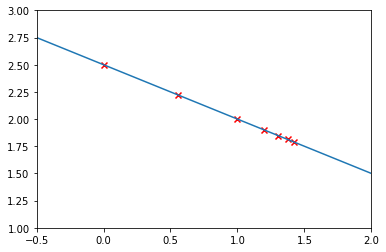

In [7]:
x = np.linspace(-1,2)
plt.plot(x,(5-x)/2)
for point in sol_list:
    plt.scatter(point[0], point[1], color='red', marker='x')
    plt.xlim(-0.5, 2)
    plt.ylim(1, 3)
plt.savefig('minNormSols')
plt.show()

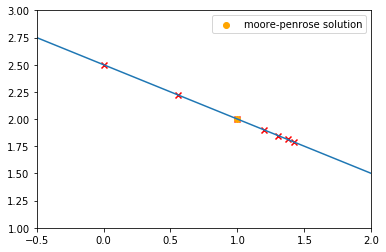

In [8]:
x = np.linspace(-1,2)
plt.plot(x,(5-x)/2)
for point in sol_list:
    plt.scatter(point[0], point[1], color='red', marker='x')
    plt.xlim(-0.5, 2)
    plt.ylim(1, 3)
A = np.array([[1], [2]])
b = 5
A_mp = A.T @ np.linalg.pinv(A @ A.T)
x_mp = A_mp * b
plt.scatter(x_mp[0][0], x_mp[0][1], c = 'orange', label='moore-penrose solution')
plt.legend()
plt.savefig('MPsol')
plt.show()

## Question 2

In [9]:
n = 100
x = np.linspace(-1,1, n)
dn = 2/(n-1)
def g(x, dn, mu = 0, sigma = 0.2):
    return dn/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x-mu)**2/(2*sigma**2))

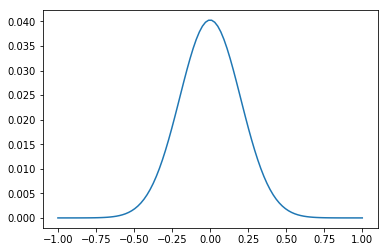

In [10]:
vector_of_values = g(x, dn)
plt.plot(x, vector_of_values)
plt.savefig('gaussianVector')
plt.show()

In [11]:
A = np.zeros(shape=(n,n))
for i in range(n):
    for j in range(n):
        A[i][j] = g(x[i] - x[j], dn)

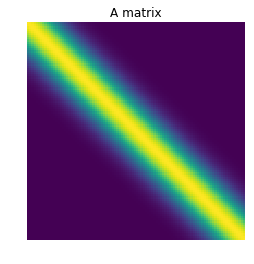

In [12]:
plt.imshow((A))
plt.axis('off')
plt.title('A matrix')
plt.savefig('A_matrix_2.png')
plt.show()

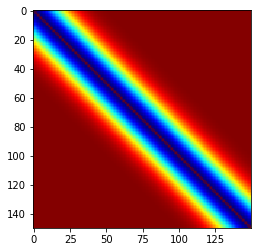

In [13]:
Atmp = np.array(np.ceil(A/np.max(A)*256), dtype = np.uint8)
Aimg = cv2.applyColorMap(Atmp, cv2.COLORMAP_JET)
height, width, depth = Aimg.shape
W = 150
imgScale = W/width
newX,newY = Aimg.shape[1]*imgScale, Aimg.shape[0]*imgScale
newimg = cv2.resize(Aimg,(int(newX),int(newY)))
cv2.imwrite("Aimage3.png", newimg)
plt.imshow(newimg)

In [14]:
U,W,Vt = np.linalg.svd(A)
print(np.linalg.norm(A - U@np.diag(W)@Vt))

2.4341815354781118e-15


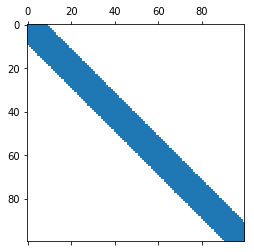

Difference between pseudos:  1.4308362856453842e+17
pinv A*A:  8.185395189451054
pinv AA*:  8.185390735501482
my A*A:  15.708772476117563
my AA*:  12.167662972492414


In [15]:
Wdag = scipy.sparse.spdiags(np.divide(1,W), 0, n, n)
plt.spy(Wdag, markersize=20)
plt.savefig('sparsity.png')
plt.show()
Adag = U @ Wdag @ Vt
Adag = Vt.T @ Wdag @ U.T
AdagTrue = np.linalg.pinv(A)
print('Difference between pseudos: ', np.linalg.norm(Adag - AdagTrue))
print('pinv A*A: ', np.linalg.norm((AdagTrue @ A) - np.eye(n)))
print('pinv AA*: ', np.linalg.norm((A @ AdagTrue) - np.eye(n)))
print('my A*A: ', np.linalg.norm((Adag @ A) - np.eye(n)))
print('my AA*: ',np.linalg.norm((A @ Adag) - np.eye(n)))

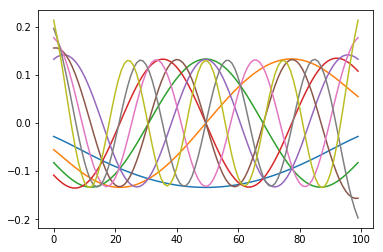

In [16]:
for i in range(9):
    plt.plot(Vt[i,:])
plt.savefig('first9V.png')
plt.show()

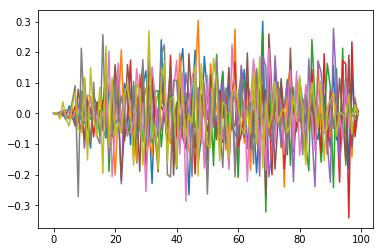

In [17]:
for i in range(9):
    plt.plot(Vt[-9+i,:])
plt.savefig('last9V.png')
plt.show()

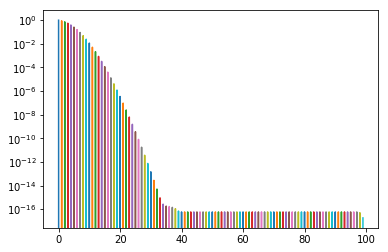

In [18]:
plt.semilogy(np.diag(W))
plt.savefig('singularValues.png')
plt.show()

## Question 3

### (a)
Create a function for f as above and plot it on a grid on the interval [􀀀1; 1]. Choose a
suciently large number of grid points n to resolve the jumps.

In [211]:
def step(a,b,x):
    if a < x <= b:
        return 1
    else:
        return 0

In [212]:
def f(x):
    val = step(-0.95, -0.6, x) + 0.2*step(-0.6,0.2,x) -0.5*step(-0.2,0.2,x)+0.7*step(0.4,0.6,x)-0.7*step(0.6,1,x) 
    return val

In [213]:
n = 100
xrange = np.linspace(-1,1,n)
dn = 2/(n-1)
frange = np.zeros(n)
for c, x in enumerate(xrange):
    frange[c] = f(x)

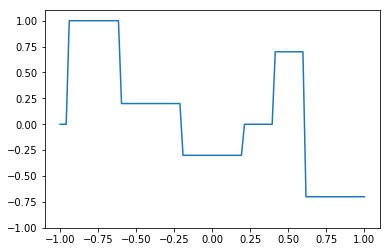

In [214]:
plt.plot(xrange,frange)
plt.ylim(-1,1.1)
plt.savefig('fstep_plot.png')
plt.show()

### (b)
Compute the matrix A as in part 2 for  = 0:05; 0:1; 0:2 and plot the singular values.

In [215]:
A_05 = np.zeros((n,n)) 
A_01 = np.zeros((n,n)) 
A_02 = np.zeros((n,n)) 

In [216]:
for i in range(n):
    for j in range(n):
        A_05[i][j] = g(xrange[i] - xrange[j], dn, sigma = 0.05)
        A_01[i][j] = g(xrange[i] - xrange[j], dn, sigma = 0.1)
        A_02[i][j] = g(xrange[i] - xrange[j], dn, sigma = 0.2)

In [217]:
W_05 = np.linalg.svd(A_05)[1]
W_01 = np.linalg.svd(A_01)[1]
W_02 = np.linalg.svd(A_02)[1]

In [237]:
# plt.semilogy(W_05, label = '\u03C3 = 0.05')
# plt.semilogy(W_01, label = '\u03C3 = 0.1')
# plt.semilogy(W_02, label = '\u03C3 = 0.2')
# plt.legend()
# plt.savefig('all_singular.png')
# plt.show()

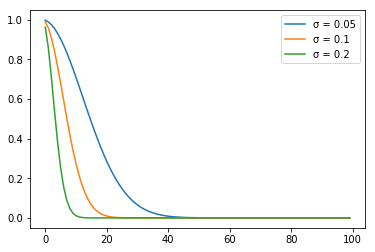

In [254]:
plt.plot(W_05, label ='\u03C3 = 0.05')
plt.plot(W_01, label ='\u03C3 = 0.1')
plt.plot(W_02, label ='\u03C3 = 0.2')
plt.legend()
plt.savefig('all_singular_2.png')
plt.show()

### (c)
Verify that the plot of the singular values follows (half) a Gaussian function and determine
the variance of this Gaussian in each case.

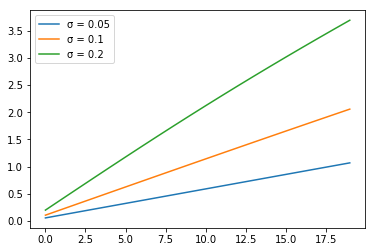

In [241]:
plt.plot(np.sqrt(np.log((1/W_05[:20]))), label ='\u03C3 = 0.05')
plt.plot(np.sqrt(np.log((1/W_01[:20]))), label ='\u03C3 = 0.1')
plt.plot(np.sqrt(np.log((1/W_02[:20]))), label ='\u03C3 = 0.2')
plt.legend()
plt.savefig('w_i.png')
plt.show()

In [242]:
w_1 = np.sqrt(np.log((1/W_05[:20])))
slope_1 = ((w_1[-1] - w_1[0])/20)
w_2 = np.sqrt(np.log((1/W_01[:20])))
slope_2 = ((w_2[-1] - w_2[0])/20)
w_3 = np.sqrt(np.log((1/W_02[:20])))
slope_3 = ((w_3[-1] - w_3[0])/20)

In [244]:
print(slope_1)
print((1/(2*slope_1**2)))

0.0506738628389999
194.7161532558196


In [245]:
print(slope_2)
print(1/(2*slope_2**2))

0.09761231186044547
52.47601007731943


In [246]:
print(slope_3)
print(1/(2*slope_3**2))

0.17478458724580456
16.366798580995603


In [158]:
x =((np.sqrt(np.log((1/W_01[:20])))[-1] - np.sqrt(np.log((1/W_01[:20])))[0])/20)/2
print(1/x)

20.336255338309446


In [159]:
x =((np.sqrt(np.log((1/W_02[:20])))[-1] - np.sqrt(np.log((1/W_02[:20])))[0])/20)/2
print(1/x)

11.388797287391883


### (d)
Perform the convolution of the function f with the the matrix A (by matrix multiplication)
for all three choices of  and plot the result.

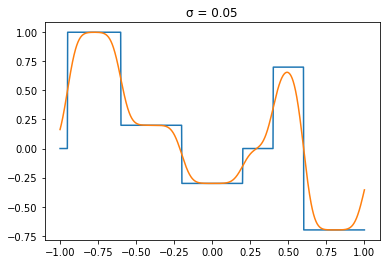

In [32]:
conv_05 = (A_05 @ frange[:,np.newaxis])
plt.plot(xrange,frange)
plt.plot(xrange,conv_05.flatten())
plt.title('\u03C3 = 0.05')
plt.show()

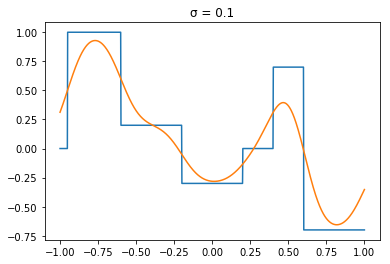

In [33]:
conv_01 = (A_01 @ frange[:,np.newaxis])
plt.plot(xrange,frange)
plt.plot(xrange,conv_01.flatten())
plt.title('\u03C3 = 0.1')
plt.show()

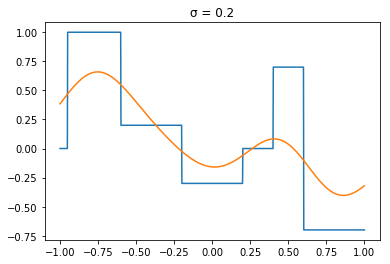

In [34]:
conv_02 = (A_02 @ frange[:,np.newaxis])
plt.plot(xrange,frange)
plt.plot(xrange,conv_02.flatten())
plt.title('\u03C3 = 0.2')
plt.show()

In [35]:
A_list = [A_05,A_01,A_02]

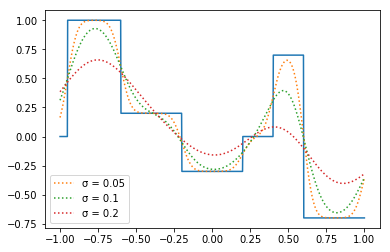

In [36]:
plt.plot(xrange,frange)
plt.plot(xrange,conv_05.flatten(), ls=':',label='\u03C3 = 0.05')
plt.plot(xrange,conv_01.flatten(), ls=':',label='\u03C3 = 0.1')
plt.plot(xrange,conv_02.flatten(), ls=':',label='\u03C3 = 0.2')
plt.legend()
plt.savefig('matrix_conv.png')
plt.show()

### (e)
Since convolution is equivalent to multiplication in Fourier space, perform convolution by
multiplication in Fourier space for the three choices of  and plot the result (remember to
take the inverse Fourier transform); comment on any dierences that you observe.

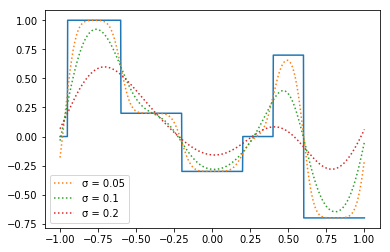

In [37]:
plt.plot(xrange,frange)
bs = []
for i in range(3):
    Fx = np.fft.fftshift(np.fft.fft(np.fft.fftshift(frange)))
    Fa = np.fft.fftshift(np.fft.fft(np.fft.fftshift(A_list[i][n//2])))
    Fb = Fa*Fx
    b = np.real(np.fft.fftshift(np.fft.ifft(np.fft.fftshift(Fb))))
    bs.append(b)
    if(i==0):
        val = 0.05
    elif(i==1):
        val = 0.1
    else:
        val = 0.2
    plt.plot(xrange, b, ls=':', label='\u03C3 = {}'.format(val))
plt.legend()
plt.savefig('conv_fourier.png')
plt.show()

### (f)
Repeat the convolution with the matrix A using periodic boundary conditions when assembling A.

In [38]:
bd = (n)//2

In [39]:
r = A_05[bd]

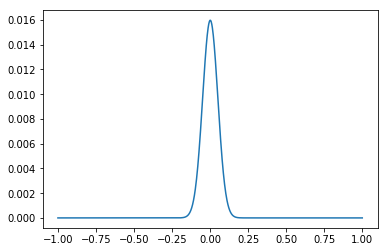

In [40]:
plt.plot(xrange, r)
plt.savefig('mean.png')
plt.show()

In [41]:
A_periodic = np.zeros(shape=(n,n))
for i in range(bd):
    A_periodic[i,:bd+i] = r[bd-i:]
    A_periodic[i,bd+i:] = r[:bd-i]
x = np.flip(np.flip(A_periodic[:bd,:], axis=0), axis=1)
A_periodic[bd:,] = x

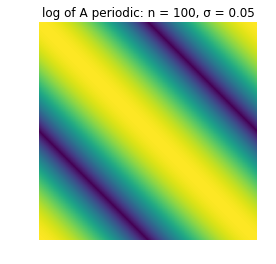

In [42]:
plt.imshow(np.log(A_periodic))
plt.axis('off')
plt.title('log of A periodic: n = 100, \u03C3 = 0.05')
plt.savefig('periodic_conv_log.png')
plt.show()

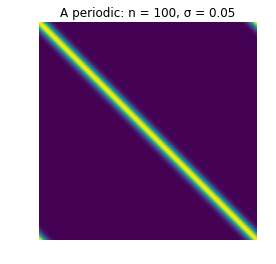

In [43]:
plt.imshow(A_periodic)
plt.axis('off')
plt.title('A periodic: n = 100, \u03C3 = 0.05')
plt.savefig('periodic_conv.png')
plt.show()

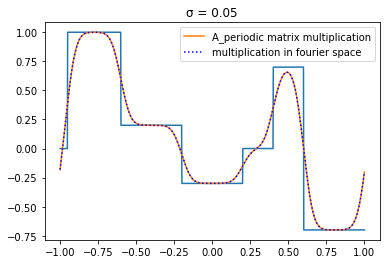

In [48]:
Fx = np.fft.fftshift(np.fft.fft(np.fft.fftshift(frange)))
Fa = np.fft.fftshift(np.fft.fft(np.fft.fftshift(A_list[0][n//2])))
Fb = Fa*Fx
b = np.real(np.fft.fftshift(np.fft.ifft(np.fft.fftshift(Fb))))

# Fx = np.fft.fft(frange)
# Fa = np.fft.fft(A_list[0][n//2])
# Fb = Fa*Fx
# b = np.real(np.fft.ifft(Fb))


conv = (A_periodic @ frange[:,np.newaxis])
plt.plot(xrange,frange)
plt.plot(xrange,conv.flatten(), label='A_periodic matrix multiplication')
plt.plot(xrange, b, ls=':',label='multiplication in fourier space', color = 'blue')
plt.title('\u03C3 = 0.05')
plt.legend()
plt.savefig('periodic_fourier_conv.png')
plt.show()

In [277]:
print(np.linalg.norm(conv.flatten() - b))

1.8291624371321575e-14
